# Ejercicio 5
Implemente un modelo LSTM o GRU bidireccional para predecir el clima, considerando los datos correspondientes de al menos un año con muestras diarias en la mañana, a medio día y en la noche. Puede generar un dataset sintético que permita establecer la efectividad del modelo desarrollado.

[Enlace a Github](https://github.com/rodrygo-c-garcia/IA_2/blob/main/PrimerParcial/Ejercicio5_RNN.ipynb)

# Generar Datos Sinteticos de clima, basandose en la ciudad Santa Cruz de la Sierra

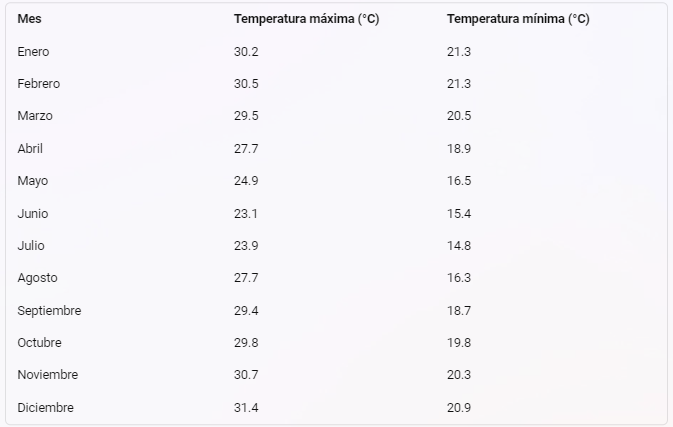

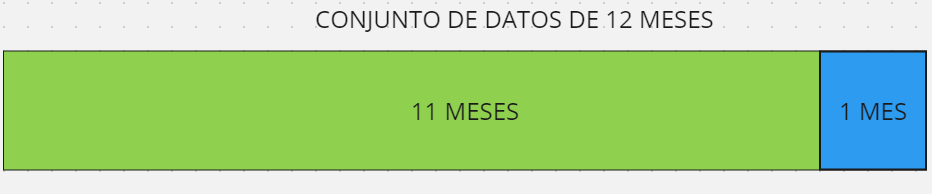

# Pasos

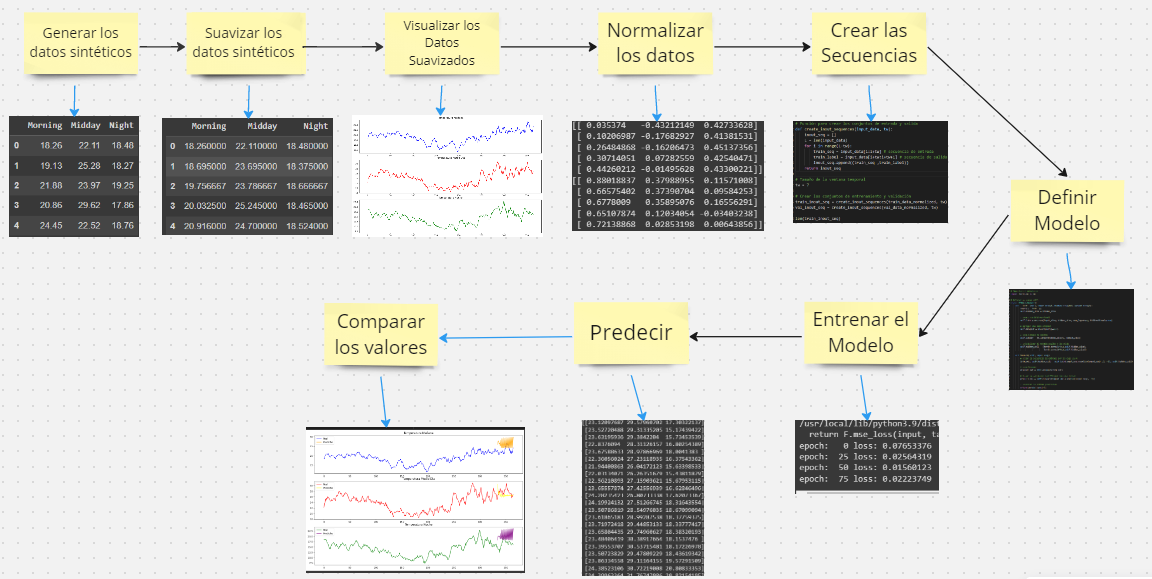

# Generar Datos Sintenticos, basandose en el promedio de temperaturas minimas y maximas de la ciudad de Santa Cruz

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Promedios mensuales de temperatura máxima y mínima
monthly_avg_max = [30.2, 30.5, 29.5, 27.7, 25.9, 23.1, 25.9, 27.7, 30.4, 35.8, 34.7, 34.4]
monthly_avg_min = [21.3, 21.3, 20.5, 18.9, 16.5, 15.4, 14.8, 16.3, 18.7, 19.8, 20.3, 20.9]

# Generar datos sintéticos
year_data = [] # Lista vacía para guardar los datos del año
for month in range(12): # Recorrer los meses del año
    # Días en el mes actual
    if month in [0, 2, 4, 6, 7, 9, 11]: # Si el mes tiene 31 días
        days = 31
    elif month == 1: # Si el mes es febrero
        days = 28
    else: # Si el mes tiene 30 días
        days = 30

    for day in range(1, days+1): # Recorrer los días del mes
        day_data = [] # Lista vacía para guardar los datos del día

        for i in range(3): # Recorrer los momentos del día (mañana, medio día y noche)
            if i == 0: # Si es la mañana
                min_temp = monthly_avg_min[month] - 3 # Restar 3 grados al promedio mínimo
                max_temp = monthly_avg_max[month] - 3 # Restar 3 grados al promedio máximo
            elif i == 1: # Si es el medio día
                min_temp = monthly_avg_min[month] # Usar el promedio mínimo tal cual
                max_temp = monthly_avg_max[month] # Usar el promedio máximo tal cual
            else: # Si es la noche
                min_temp = monthly_avg_min[month] - 6 # Restar 6 grados al promedio mínimo
                max_temp = monthly_avg_max[month] - 6 # Restar 6 grados al promedio máximo
                
            temp = np.round(np.random.uniform(min_temp, max_temp), 2) # Generar un valor aleatorio de temperatura dentro del rango y redondearlo a dos decimales
            day_data.append(temp) # Agregar el valor a la lista del día

        year_data.append(day_data) # Agregar la lista del día a la lista del año


In [45]:
# Convertir los datos en un DataFrame de pandas
df = pd.DataFrame(year_data, columns=['Morning', 'Midday', 'Night'])
df.head()

,Morning,Midday,Night
0,26.47,25.89,15.62
1,19.43,29.57,21.09
2,19.57,29.90,17.38
3,22.19,24.37,24.19
4,25.82,29.34,23.92


Suavizar los datos significa hacer que los valores de una variable cambien menos de un día a otro. Esto se hace calculando el promedio de los valores de varios días seguidos. Así se eliminan los picos y las caídas que pueden ser por casualidad y no por una tendencia real. Suavizar los datos puede ayudar a ver mejor cómo cambia una variable a lo largo del tiempo y a predecir su comportamiento futuro.

In [46]:
# Suavizar los datos usando la media móvil
df_smooth = df.rolling(7, min_periods=1).mean()
df_smooth.head()

,Morning,Midday,Night
0,26.470000,25.890000,15.620
1,22.950000,27.730000,18.355
2,21.823333,28.453333,18.030
3,21.915000,27.432500,19.570
4,22.696000,27.814000,20.440


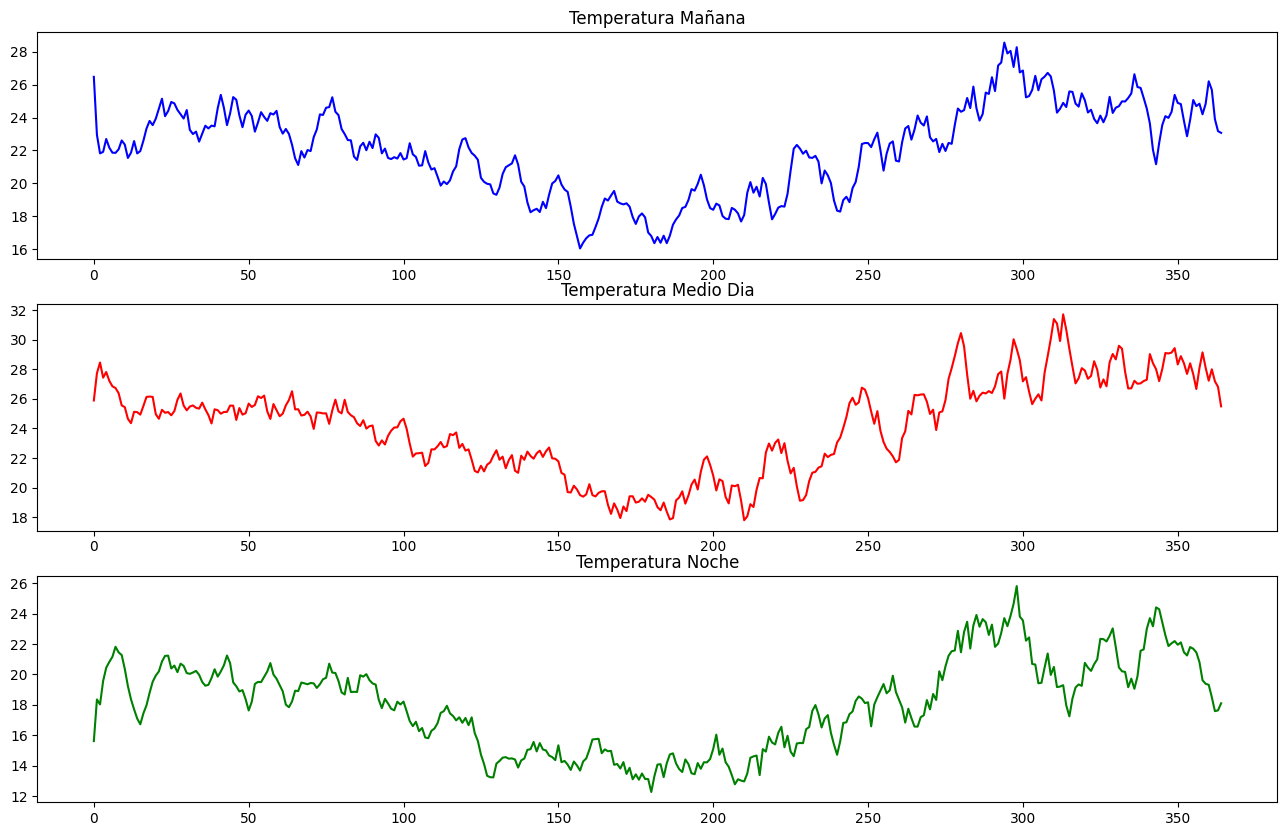

In [47]:
# Graficar los datos en distintas gráficas
fig, axs = plt.subplots(3, 1, figsize=(16,10))
axs[0].plot(df_smooth['Morning'], color='blue')
axs[0].set_title('Temperatura Mañana')
axs[1].plot(df_smooth['Midday'], color='red') 
axs[1].set_title('Temperatura Medio Dia')
axs[2].plot(df_smooth['Night'], color='green')
axs[2].set_title('Temperatura Noche')
plt.show()

In [48]:
# Convertir el df_smooth a una lista
smooth_data = df_smooth.values.tolist()

In [49]:
# Convertir la lista a un array de numpy
smooth_data = np.array(smooth_data)

# Dividir los datos en entrenamiento y validación
train_data = smooth_data[:-31].reshape(-1, 3)
val_data = smooth_data[-31:].reshape(-1, 3)
print(train_data)

[[26.47       25.89       15.62      ]
 [22.95       27.73       18.355     ]
 [21.82333333 28.45333333 18.03      ]
 ...
 [24.68714286 29.58428571 20.46285714]
 [24.98142857 29.39       20.20428571]
 [24.97285714 27.82857143 20.16571429]]


In [13]:
train_data.shape

(334, 3)

In [14]:
val_data.shape

(31, 3)

# Normalizacion

In [50]:
# Importar la clase MinMaxScaler del módulo sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia de la clase MinMaxScaler con el rango de valores de salida entre -1 y 1
scaler = MinMaxScaler(feature_range=(-1, 1))

# Normalizar los datos de entrenamiento usando la instancia de MinMaxScaler creada
train_data_normalized = scaler.fit_transform(train_data)

# Normalizar los datos de validación usando la misma instancia de MinMaxScaler creada
val_data_normalized = scaler.fit_transform(val_data)

print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[ 0.66716196  0.16296753 -0.50565121]
 [ 0.10389759  0.42766132 -0.10119362]
 [-0.07638968  0.53171667 -0.14925531]
 [-0.06172134  0.38486436  0.07848315]
 [ 0.06325294  0.43974517  0.20714059]]
[[0.31649331 0.61487875 0.58931024]
 [0.36769917 0.5622688  0.40614767]
 [0.38187221 0.69441019 0.21052076]
 [0.42896331 0.66646116 0.17228267]
 [0.42759172 0.44184135 0.16657864]]


In [16]:
train_data_normalized.shape

(334, 3)

In [17]:
val_data_normalized.shape

(31, 3)

# Convertir datos a Tensores

In [51]:
import torch

train_data_normalized = torch.from_numpy(train_data_normalized).type(torch.FloatTensor)
val_data_normalized = torch.from_numpy(val_data_normalized).type(torch.FloatTensor)

train_data_normalized.shape

torch.Size([334, 3])

In [19]:
val_data_normalized.shape

torch.Size([31, 3])

# Funcion para crear secuencias

La función **create_inout_sequences** se encarga de crear secuencias de entrada y salida para el modelo a partir de los datos normalizados. Crea pares de secuencias de entrada y etiquetas de entrenamiento

In [52]:
# Función para crear los conjuntos de entrada y salida
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw] # secuencia de entrada
        train_label = input_data[i+tw:i+tw+1] # secuencia de salida
        inout_seq.append((train_seq ,train_label))
    return inout_seq

# Tamaño de la ventana temporal
tw = 7

# Crear los conjuntos de entrenamiento y validación
train_inout_seq = create_inout_sequences(train_data_normalized, tw)
val_inout_seq = create_inout_sequences(val_data_normalized, tw)

len(train_inout_seq)

327

In [21]:
len(val_inout_seq)

24

# Definiendo Modelo LSTM

La **LSTM bidireccional** es un tipo de red neuronal recurrente que procesa secuencias de datos en dos direcciones simultáneamente, es decir, avanza tanto en el sentido normal de la secuencia como en el sentido inverso. Esto permite capturar información de la secuencia en ambas direcciones y mejorar la capacidad de la red para modelar patrones complejos en los datos.

In [53]:
# Importar el módulo nn
import torch.nn as nn

# Definir la clase LSTM
class LSTM(nn.Module):
    def __init__(self, input_size=3, hidden_size=100, output_size=3):
        super().__init__()
        self.hidden_size = hidden_size

        # Capa LSTM bidireccional
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=2, bidirectional=True)
       
        # Agregar una capa Dropout
        self.dropout = nn.Dropout(p=0.2)

        # Capa lineal de salida
        self.linear = nn.Linear(hidden_size*2, output_size)

        # Inicializar el estado oculto y la celda, el estado oculto y la celda son componentes importantes de la LSTM que permiten a la red almacenar y actualizar información relevante
        self.hidden_cell = (torch.zeros(2*2,1,self.hidden_size),
                            torch.zeros(2*2,1,self.hidden_size))

    def forward(self, input_seq):
        # Pasar la secuencia de entrada por la capa LSTM
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)

        # capa Dropout
        dropout_out = self.dropout(lstm_out)

        # Pasar la salida de la LSTM por la capa lineal
        predictions = self.linear(dropout_out.view(len(input_seq), -1))
        
        # Devolver la última predicción
        return predictions[-1]

In [54]:
# Importar el módulo optim
import torch.optim as optim

# Instanciar el modelo
model = LSTM()
model 

LSTM(
  (lstm): LSTM(3, 100, num_layers=2, bidirectional=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear): Linear(in_features=200, out_features=3, bias=True)
)

In [55]:
# Definir la función de pérdida
loss_function = nn.MSELoss()

# Definir el optimizador
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del Modelo

In [74]:
epochs = 100
train_losses = [] 
val_losses = [] 

for i in range(epochs):
    train_loss = 0.0 # Reiniciar la pérdida de entrenamiento para esta época
    val_loss = 0.0 # Reiniciar la pérdida de validación para esta época
    
    # Entrenamiento
    model.train() 
    for seq, label in train_inout_seq:
        optimizer.zero_grad() # Reiniciar los gradientes
        model.hidden_cell = (torch.zeros(4, 1, model.hidden_size),
                             torch.zeros(4, 1, model.hidden_size)) # Reiniciar el estado oculto de la red

        y_pred = model(seq) # Propagación hacia adelante a través de la red
        loss = loss_function(y_pred, label) # Calcular la pérdida para la predicción actual
        loss.backward() # Propagación hacia atrás de la pérdida
        optimizer.step() # Actualizar los pesos de la red
        train_loss += loss.item() * seq.shape[0] # Acumular la pérdida para esta secuencia
    train_loss /= len(train_inout_seq) # Calcular la pérdida promedio por secuencia
    train_losses.append(train_loss) # Agregar la pérdida promedio a la lista de pérdidas de entrenamiento
    
    # Validación
    model.eval() 
    with torch.no_grad(): # Desactivar el cálculo de gradientes para la validación
        for seq, label in val_inout_seq:
            model.hidden_cell = (torch.zeros(4, 1, model.hidden_size),
                                 torch.zeros(4, 1, model.hidden_size)) # Reiniciar el estado oculto de la red
                                 
            y_pred = model(seq) # Propagación hacia adelante a través de la red
            loss = loss_function(y_pred, label) # Calcular la pérdida para la predicción actual
            val_loss += loss.item() * seq.shape[0] # Acumular la pérdida para esta secuencia
    val_loss /= len(val_inout_seq) # Calcular la pérdida promedio por secuencia
    val_losses.append(val_loss) # Agregar la pérdida promedio a la lista de pérdidas de validación
    
    # Imprimir la pérdida cada 25 épocas
    if i % 25 == 0:
        print(f'epoch: {i:3} train_loss: {train_loss:10.8f} val_loss: {val_loss:10.8f}')
        
# Imprimir la pérdida final
print(f'epoch: {i:3} train_loss: {train_loss:10.10f} val_loss: {val_loss:10.10f}')


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 3])) that is different to the input size (torch.Size([3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:   0 loss: 0.00884207
epoch:  25 loss: 0.00400737
epoch:  50 loss: 0.00124139
epoch:  75 loss: 0.00057182
epoch:  99 loss: 0.0085205799


# Prediccion de los Datos

In [75]:
fut_pred=31

# Obtener los últimos datos de entrenamiento normalizados
test_inputs = val_data_normalized[-tw:].tolist()

# Establecer el modelo en modo de evaluación
model.eval()

# Realizar predicciones futuras
for i in range(fut_pred):
  # Crear una secuencia de entrada a partir de los últimos datos de prueba
  seq = torch.FloatTensor(test_inputs[-tw:])
  # Desactivar el cálculo de gradientes para la predicción
  with torch.no_grad():
    # Establecer el estado oculto inicial en cero
    model.hidden = (torch.zeros(4,1,model.hidden_size),
                      torch.zeros(4,1,model.hidden_size))
        
    # Realizar la predicción y agregarla a los datos de prueba
    test_inputs.append(model(seq).tolist())
        
# Invertir la normalización y obtener las predicciones reales
actual_predictions = scaler.inverse_transform(np.array(test_inputs[tw:]).reshape(-1,3))

In [70]:
print(actual_predictions)

[[24.23750147 26.50159415 20.12583309]
 [24.58014458 26.90813762 20.14906973]
 [24.48684645 27.35170562 20.6884511 ]
 [23.90225259 26.69156392 20.97558159]
 [25.05245536 27.37743142 25.60150978]
 [24.47463421 27.66853874 23.88556378]
 [23.68109221 27.21069755 22.8827376 ]
 [24.49004618 27.20889236 22.47901231]
 [25.45112096 26.99555554 23.3991441 ]
 [25.48848147 26.99438616 23.87019985]
 [25.32004476 27.44846737 24.01275538]
 [25.3257868  27.36536188 23.22227145]
 [25.27935041 27.27019932 22.86090003]
 [25.9124143  27.3236814  22.50684463]
 [26.13016526 27.53438704 22.24593644]
 [26.40071231 27.89228911 22.53845793]
 [27.32106603 27.93316045 23.17135728]
 [28.47915985 27.83803615 24.07876094]
 [27.71131953 28.52752456 24.22158859]
 [27.620981   29.17004486 25.45459166]
 [26.99242166 29.84488652 25.59644371]
 [28.49308111 30.10562594 26.4483464 ]
 [27.64164516 30.36201623 24.75066312]
 [27.62792616 29.46674566 24.49674093]
 [28.77040934 29.03250611 24.25639514]
 [28.73322421 28.61046864

In [28]:
len(actual_predictions)

31

# Visualizacion de los DATOS

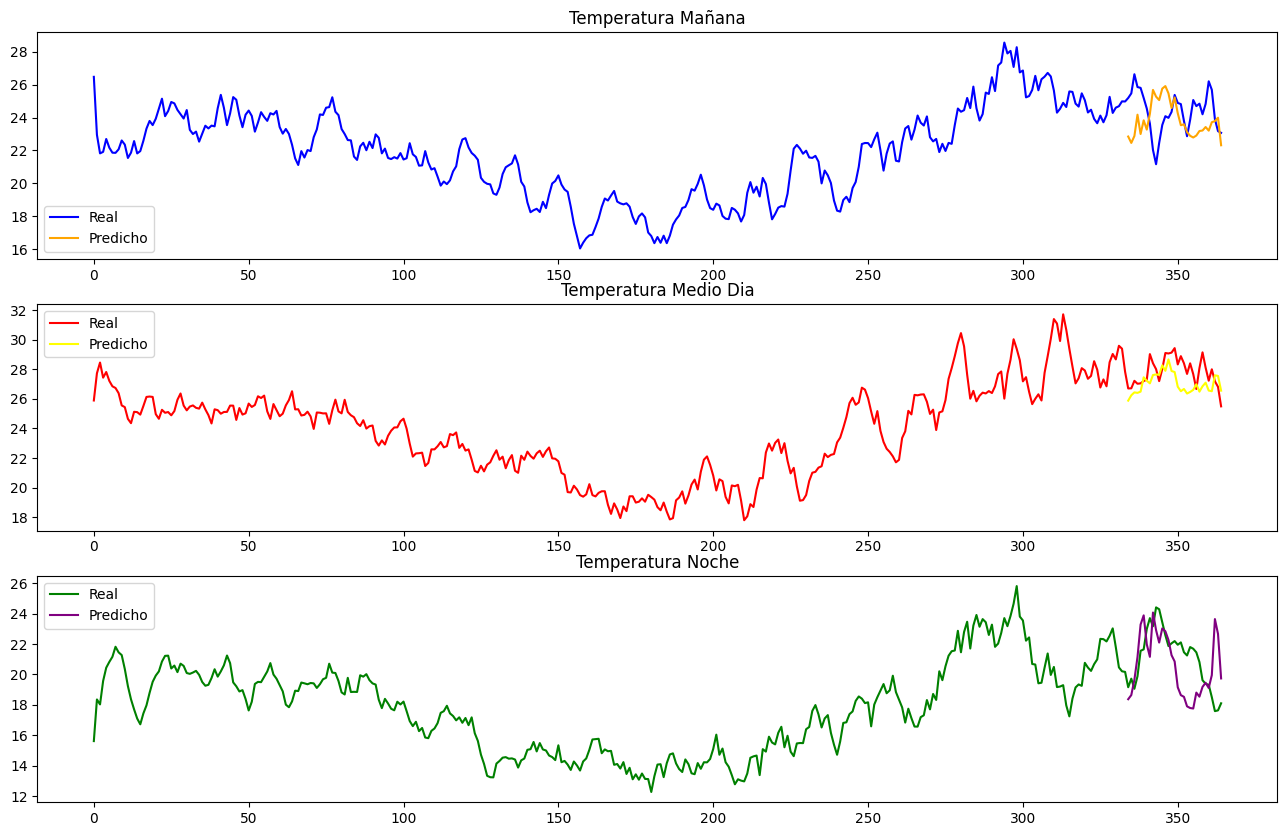

In [76]:
x = np.arange(len(df_smooth)-31, len(df_smooth))

# Graficar los datos en distintas gráficas
fig, axs = plt.subplots(3, 1, figsize=(16,10))
axs[0].plot(df_smooth['Morning'], color='blue', label='Real')
axs[0].plot(x[-31:], actual_predictions[:, 0], color='orange', label='Predicho')
axs[0].set_title('Temperatura Mañana')
axs[0].legend()
axs[1].plot(df_smooth['Midday'], color='red', label='Real')
axs[1].plot(x[-31:], actual_predictions[:, 1], color='yellow', label='Predicho')
axs[1].set_title('Temperatura Medio Dia')
axs[1].legend()
axs[2].plot(df_smooth['Night'], color='green', label='Real')
axs[2].plot(x[-31:], actual_predictions[:, 2], color='purple', label='Predicho')
axs[2].set_title('Temperatura Noche')
axs[2].legend()
plt.show()

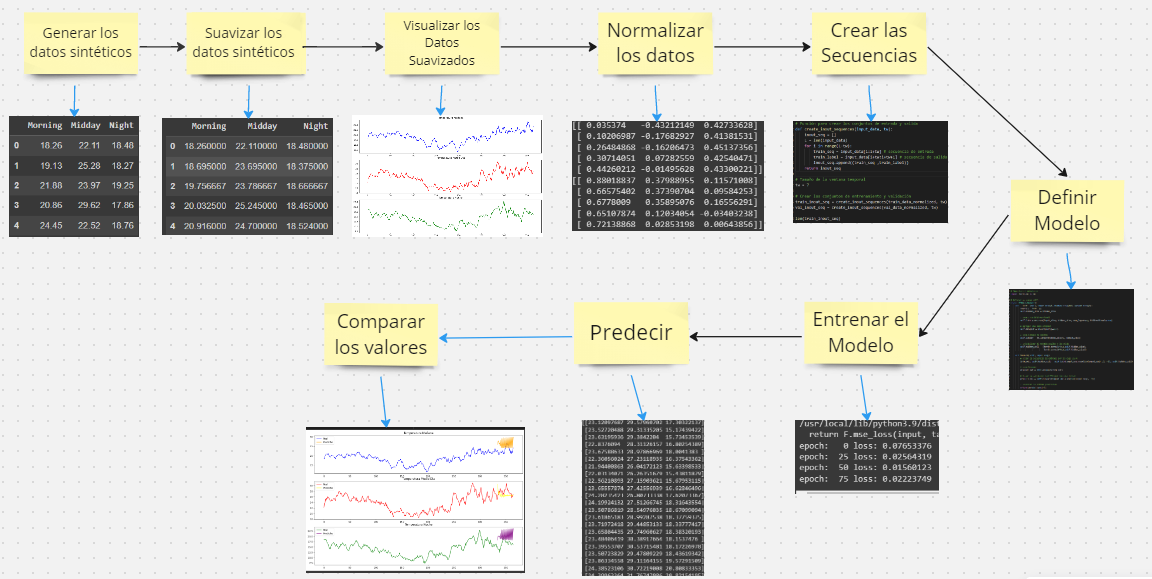